<h2>Menghubungkan ke google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


<h2>Memanggil data set<h2>




In [4]:
path = "/content/drive/MyDrive/Machine_Learning/praktikum3/data"

<h2>Membaca data csv<h2>

In [7]:
import pandas as pd
df = pd.read_csv(path + "/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<h2>Menampilkan statistik deskriptif<h2>

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<h2>Memilih dan mengubah nama kolom<h2>

In [9]:
df1 = (df[["cnt", "holiday", "weekday", "workingday"]]
       .rename(columns={"cnt": "jumlah", "holiday": "libur", "weekday": "seminggu", "workingday": "kerja"}).copy())
df1

,jumlah,libur,seminggu,kerja
0,985,0,6,0
1,801,0,0,0
2,1349,0,1,1
3,1562,0,2,1
4,1600,0,3,1
...,...,...,...,...
726,2114,0,4,1
727,3095,0,5,1
728,1341,0,6,0
729,1796,0,0,0


<h2>Analisis Korelasi<h2>


In [10]:
corr_matrix = df1.corr()

print(corr_matrix)

            jumlah     libur  seminggu     kerja
jumlah    1.000000 -0.068348  0.067443  0.061156
libur    -0.068348  1.000000 -0.101960 -0.253023
seminggu  0.067443 -0.101960  1.000000  0.035790
kerja     0.061156 -0.253023  0.035790  1.000000


<h2>Membuat heatmap grafik<h2>

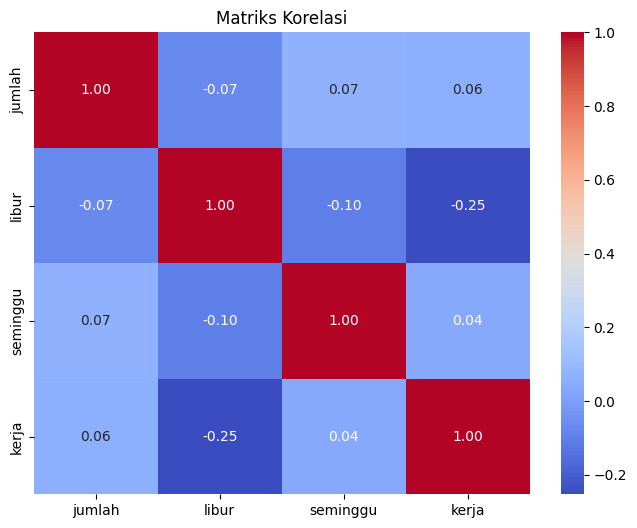

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

<h2>Membagi dataset untuk Training dan Test<h2>


In [12]:
from sklearn.model_selection import train_test_split

# Membuat Variabel terikat dan variabel bebas
# Variabel y (terikat)
y = df1["jumlah"]

# Variabel X (bebas)
X = df1[["seminggu", "libur"]]

# Membagi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cetak
print("Jumlah data Training:", len(X_train))
print("Jumlah data Testing:", len(X_test))

Jumlah data Training: 584
Jumlah data Testing: 147


<h2>Tambahkan konstanta ke dalam model<h2>

In [13]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,seminggu,libur
682,1.0,2,0
250,1.0,4,0
336,1.0,6,0
260,1.0,0,0
543,1.0,3,0


<h2>Membuat model OLS<h2>

In [14]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train_const).fit()
print('--------------------------------------------')
print(model.params)
print('--------------------------------------------')
const = model.params['const']
x1_coef = model.params['seminggu']
x2_coef = model.params['libur']
# Print persamaan regresi
print(f"y = {const:.3f} + {x1_coef:.3f}*x1 + {x2_coef:.3f}*x2")

--------------------------------------------
const       4387.515947
seminggu      65.524972
libur       -856.187570
dtype: float64
--------------------------------------------
y = 4387.516 + 65.525*x1 + -856.188*x2


<h2>Menampilkan ringkasan model<h2>

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 jumlah   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.215
Date:                Sun, 12 Oct 2025   Prob (F-statistic):             0.0409
Time:                        14:33:52   Log-Likelihood:                -5238.9
No. Observations:                 584   AIC:                         1.048e+04
Df Residuals:                     581   BIC:                         1.050e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4387.5159    143.142     30.651      0.0

<h2>Pengujian model dengan data testing<h2>

In [20]:

# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Weekday": X_test["seminggu"].to_numpy(),
    "Holiday": X_test["libur"].to_numpy(),
    "Jumlah": y_test.to_numpy(),
    "Jumlah Prediksi": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error"] = hasil["Jumlah Prediksi"] - hasil["Jumlah"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Jumlah"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error"].abs() / denom)) * 100
hasil["Akurasi (%)"] = hasil["Akurasi (%)"].clip(lower=0, upper=100) # batasi ke 0-100

hasil

,Weekday,Holiday,Jumlah,Jumlah Prediksi,Selisih error,Akurasi (%)
703,2,0,6606,4518.565890,-2087.434110,68.400937
33,4,0,1550,4649.615833,3099.615833,0.000000
300,5,0,3747,4715.140805,968.140805,74.162242
456,0,0,6041,4387.515947,-1653.484053,72.628968
633,2,0,7538,4518.565890,-3019.434110,59.943830
...,...,...,...,...,...,...
70,6,0,2132,4780.665777,2648.665777,0.000000
192,2,0,4258,4518.565890,260.565890,93.880557
328,5,0,2792,4715.140805,1923.140805,31.119599
165,3,0,5180,4584.090862,-595.909138,88.495963
